<a href="https://colab.research.google.com/github/Viktoriia-kama/ML_hw4-hw16/blob/main/HW9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

У цьому завданні вам потрібно завантажити датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [11]:
df_data_2d = pd.read_csv('data_2d.csv', header=None)

df_data_2d.columns = ['Index', 'Column1', 'Column2',]
df_data_2d = pd.DataFrame(df_data_2d)
df_data_2d.head()

,Index,Column1,Column2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [13]:
df_mnist = pd.read_csv('mnist.csv', header=None)
df_mnist = pd.DataFrame(df_mnist)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_data_2d.isna().sum()

Index      0
Column1    0
Column2    0
dtype: int64

In [17]:
df_mnist.isna().sum().sum()

0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

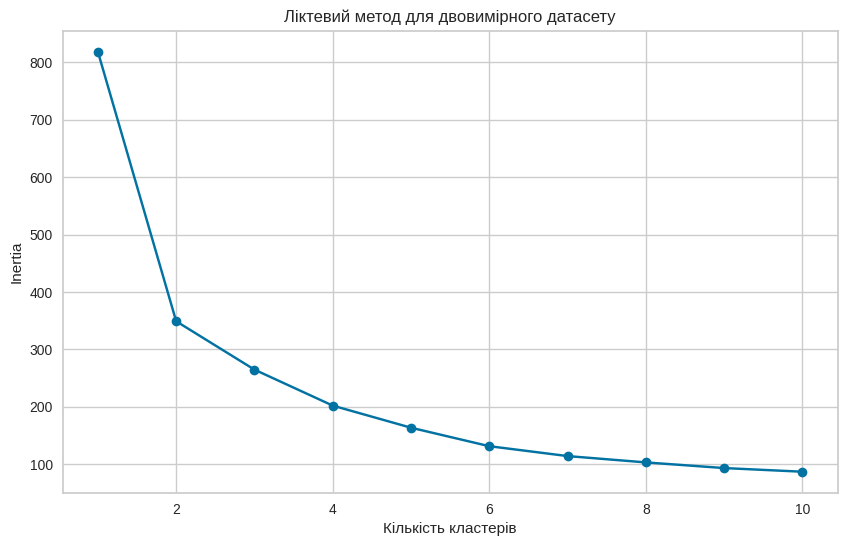

In [6]:
# Підготовка даних для K-means
df_data_2d = df_data_2d[['Column1', 'Column2']].values

# Використання ліктевого методу для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_data_2d)
    inertia.append(kmeans.inertia_)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Ліктевий метод для двовимірного датасету')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

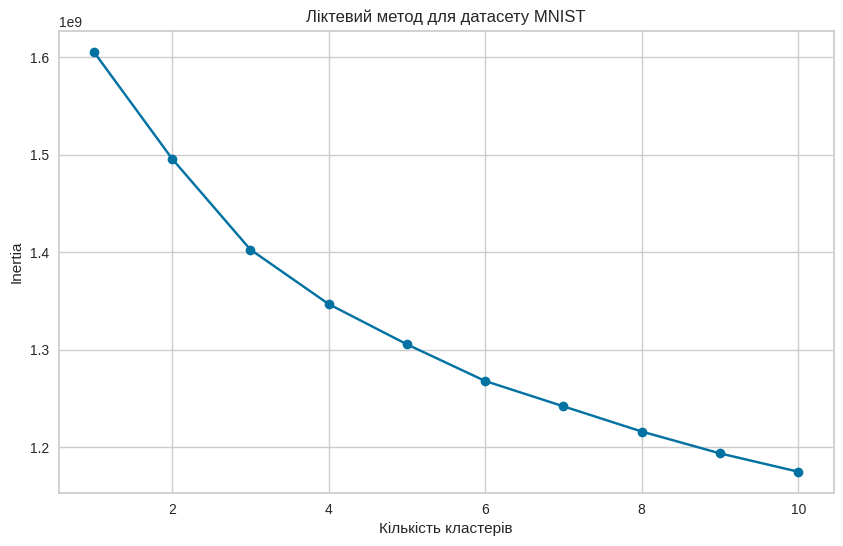

In [7]:
# Підготовка даних для K-means
df_mnist = df_mnist.values

# Використання ліктевого методу для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mnist)
    inertia.append(kmeans.inertia_)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Ліктевий метод для датасету MNIST')
plt.show()


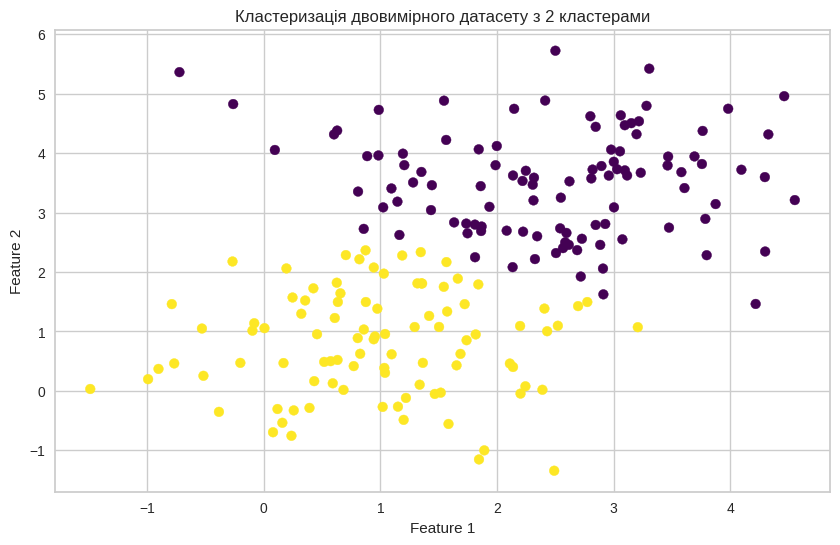

In [8]:
# Застосування K-means з 2 кластерами
kmeans_2d = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans_2d.fit(df_data_2d)
labels_2d = kmeans_2d.labels_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(df_data_2d[:, 0], df_data_2d[:, 1], c=labels_2d, cmap='viridis', marker='o')
plt.title('Кластеризація двовимірного датасету з 2 кластерами')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


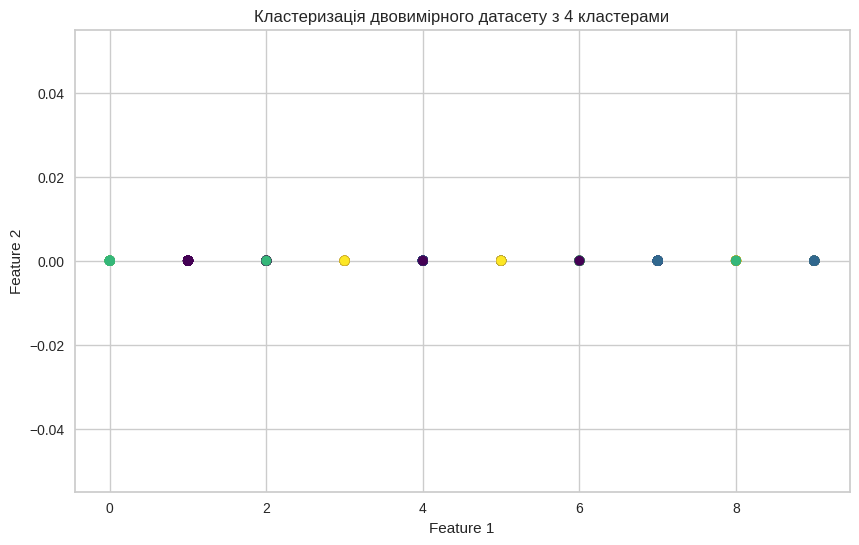

In [9]:
# Застосування K-means з 4 кластерами
kmeans_mnist = KMeans(n_clusters=4, random_state=42)
kmeans_mnist.fit(df_mnist)
labels_mnist = kmeans_mnist.labels_


# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(df_mnist[:, 0], df_mnist[:, 1], c=labels_mnist, cmap='viridis', marker='o')
plt.title('Кластеризація двовимірного датасету з 4 кластерами')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()